In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/Fish.csv')

data = df[['Length2']]
target = df['Weight']

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=50, random_state=42
)

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
print(lr.score(train_poly, train_target))

0.8765617230148243


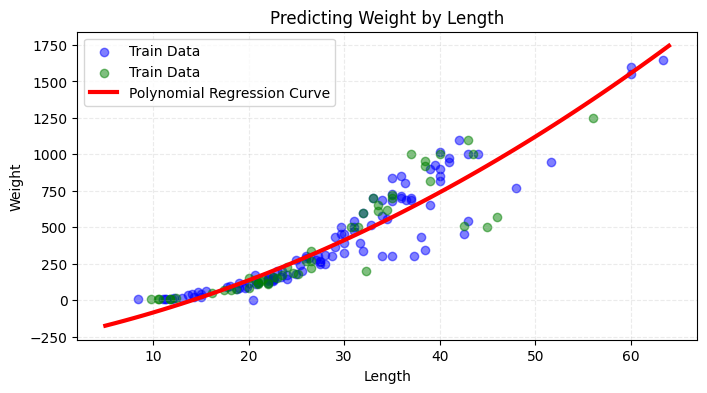

학습 세트 점수: 0.8766
테스트 세트 점수: 0.8056


In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.title('Predicting Weight by Length')

# 실제 데이터 점 찍기
plt.scatter(train_input, train_target, color='blue', alpha=0.5, label='Train Data')
plt.scatter(test_input, test_target, color='green', alpha=0.5, label='Train Data')

point = np.arange(5, 65)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_, 
         color='red', linewidth=3, label='Polynomial Regression Curve')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.25)
plt.show()

# 모델 성능 확인 (결정계수 R^2)
print(f"학습 세트 점수: {lr.score(train_poly, train_target):.4f}")
print(f"테스트 세트 점수: {lr.score(test_poly, test_target):.4f}")